<a href="https://colab.research.google.com/github/Guliko24/CE807_Text_Analytics/blob/main/Assignment/EDA_text_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_PostNatal.xlsx to data_PostNatal.xlsx


In [ ]:
import pandas as pd
data= "/content/data_PostNatal.xlsx"
df=pd.read_excel(data)
df.head()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt,Feeling anxious
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,No,Yes,Yes,Yes
1,40-45,Yes,No,No,Yes,Yes,Yes,Yes,No,No
2,35-40,Yes,No,Yes,Yes,Yes,No,Sometimes,No,Yes
3,35-40,Yes,Yes,Yes,Yes,No,Maybe,No,No,Yes
4,40-45,Yes,No,Two or more days a week,Yes,No,No,Yes,No,Yes


Let's do some exloratory data analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from pd.tools import plotting
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats



## **Basic EDA and statistical analysis**

In [ ]:

df.info(verbose=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Age                                        1503 non-null   object
 1   Feeling sad or Tearful                     1503 non-null   object
 2   Irritable towards baby & partner           1497 non-null   object
 3   Trouble sleeping at night                  1503 non-null   object
 4   Problems concentrating or making decision  1491 non-null   object
 5   Overeating or loss of appetite             1503 non-null   object
 6   Feeling of guilt                           1494 non-null   object
 7   Problems of bonding with baby              1503 non-null   object
 8   Suicide attempt                            1503 non-null   object
 9   Feeling anxious                            1503 non-null   object
dtypes: object(10)
memory usage: 117.5+ K

In [ ]:
df.describe()


,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt,Feeling anxious
count,1503,1503,1497,1503,1491,1503,1494,1503,1503,1503
unique,5,3,3,3,3,3,3,3,3,2
top,40-45,Yes,Yes,Two or more days a week,No,No,No,No,No,Yes
freq,364,536,555,640,583,841,624,557,709,980


In [ ]:
df.isna().sum()

Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
Feeling anxious                               0
dtype: int64

In [ ]:
#in order to fill this NaNs, we need to see the data distribution, but I could not plot categorical data.
#Let's replace NaN values with modes as these are non-numerical/categorical values
df_copy=df.copy()

df_copy['Irritable towards baby & partner'].fillna(df_copy['Irritable towards baby & partner'].mode()[0], inplace = True)
df_copy['Problems concentrating or making decision'].fillna(df_copy['Problems concentrating or making decision'].mode()[0], inplace = True)
df_copy['Feeling of guilt'].fillna(df_copy['Feeling of guilt'].mode()[0], inplace = True)
df_copy.isna().sum()

Age                                          0
Feeling sad or Tearful                       0
Irritable towards baby & partner             0
Trouble sleeping at night                    0
Problems concentrating or making decision    0
Overeating or loss of appetite               0
Feeling of guilt                             0
Problems of bonding with baby                0
Suicide attempt                              0
Feeling anxious                              0
dtype: int64

<Axes: xlabel='Feeling anxious', ylabel='Count'>

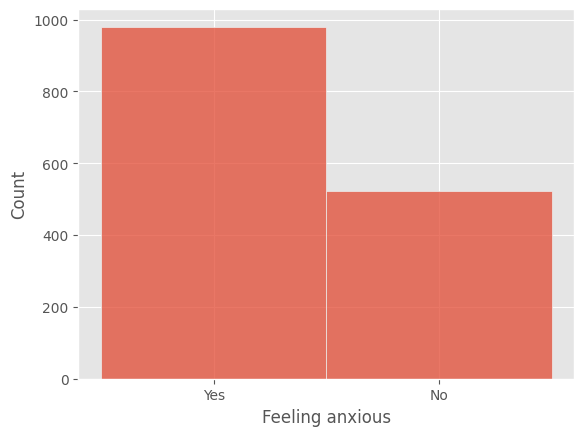

In [ ]:
sns.histplot(df["Feeling anxious"])

The above plot shows that the outcome is not normally distributed and there is over-repesentation of the 'Yes'. Some undersampling or oversampling will be needed when trainig models.


**Data Visualization**


In [ ]:
# Let's check the distribution/representation of the target "Feeling anxious"

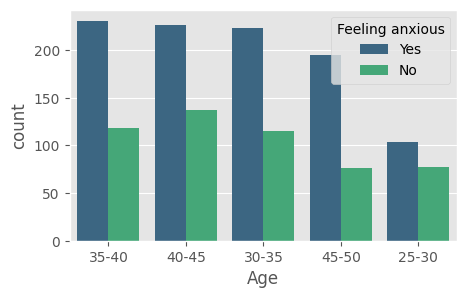

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_copy' is your DataFrame and it's already defined
plt.figure(figsize=(5, 3))  # Adjust the width and height as needed

sns.countplot(x='Age', hue='Feeling anxious', data=df_copy, palette='viridis')

plt.show()# Age vs Feeling Anxious



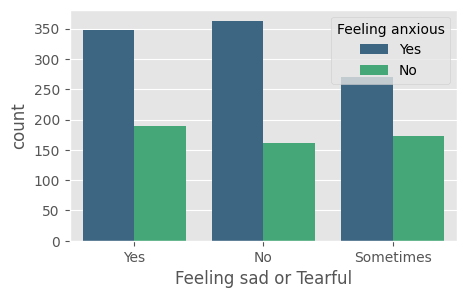

In [ ]:

# Assuming 'df_copy' is your DataFrame and it's already defined
plt.figure(figsize=(5, 3))  # Adjust the width and height as needed

sns.countplot(x='Feeling sad or Tearful', hue='Feeling anxious', data=df_copy, palette='viridis')

plt.show()


There seems no correlation of feeling sad/tearful with Feeling anxious as both Yes and Nos and Sometimes lead to double the outcome of Yes/Feeling anxious


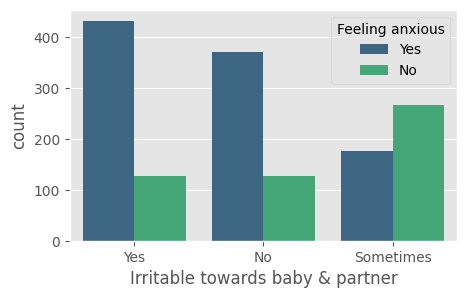

In [ ]:
# Irritable towards baby & partner vs Feeling anxious
plt.figure(figsize=(5, 3))  # Adjust the width and height as needed

sns.countplot(x='Irritable towards baby & partner', hue='Feeling anxious', data=df_copy, palette='viridis')

plt.show()



This particular feature does not seem to contribute to the particular outcome.

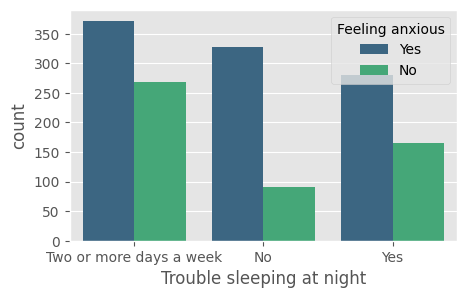

In [ ]:
#Trouble sleeping at night vs Feeling anxious
plt.figure(figsize=(5, 3))  # Adjust the width and height as needed
sns.countplot(x='Trouble sleeping at night', hue='Feeling anxious', data=df_copy, palette='viridis')
plt.show()

There seems to be some correlation of sleep and feeling anxious

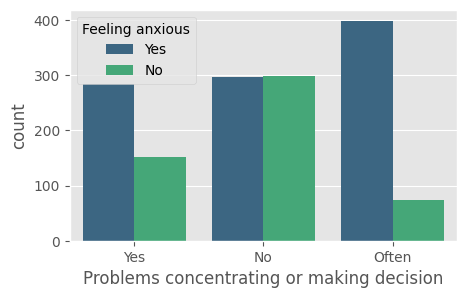

In [ ]:
#Problems concentrating or making decision
plt.figure(figsize=(5, 3))  # Adjust the width and height as needed
sns.countplot(x='Problems concentrating or making decision', hue='Feeling anxious', data=df_copy, palette='viridis')
plt.show()


The above plot shows that the outcome is not normally distributed and there is over-repesentation of the 'Yes'. Some undersampling or oversampling will be needed.


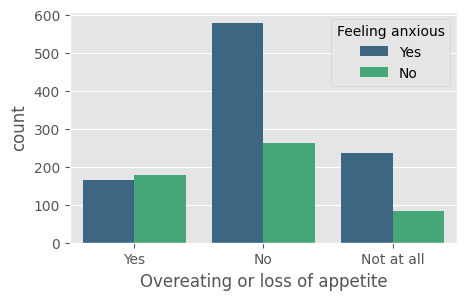

In [ ]:
#Overeating or loss of appetite
plt.figure(figsize=(5, 3))  # Adjust the width and height as needed
sns.countplot(x='Overeating or loss of appetite', hue='Feeling anxious', data=df_copy, palette='viridis')
plt.show()

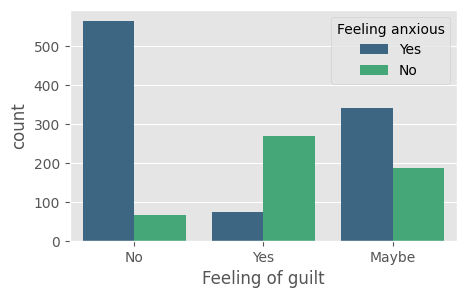

In [ ]:
#Feeling of guilt                              9
plt.figure(figsize=(5, 3))  # Adjust the width and height as needed
sns.countplot(x='Feeling of guilt', hue='Feeling anxious', data=df_copy, palette='viridis')
plt.show()

This is a very "strange"plot when the feature is in negative correlation with an outcome

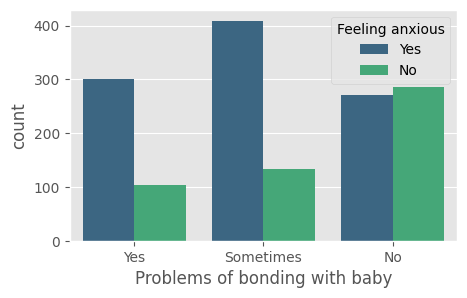

In [ ]:
#Problems of bonding with baby
plt.figure(figsize=(5, 3))  # Adjust the width and height as needed
sns.countplot(x='Problems of bonding with baby', hue='Feeling anxious', data=df_copy, palette='viridis')
plt.show()

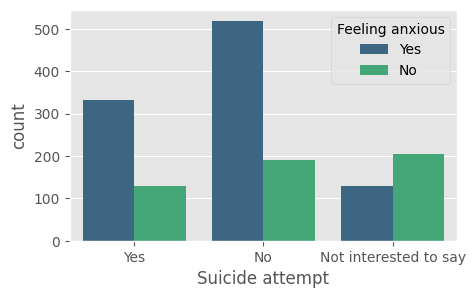

In [ ]:
#Suicide attempt
plt.figure(figsize=(5, 3))  # Adjust the width and height as needed
sns.countplot(x='Suicide attempt', hue='Feeling anxious', data=df_copy, palette='viridis')
plt.show()

In [ ]:
#it is worth trying Shapley coeff here to see which features are the most contributing to the outcome

# **Data Preprocessing**

-I am not dropping any feature at this moment
-All the NaNs have been replaced with modes for that feature.



In [ ]:
#let's separate the data and labels

X = df_copy.loc[:, df.columns != 'Feeling anxious']
Y = df_copy.loc[:, 'Feeling anxious']
print(X.shape, Y.shape)

(1503, 9) (1503,)


In [ ]:

# One Hot Encoding of all the columns in X
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the column indices that you want to transform - in this case, columns 0 to 7
columns_to_encode = list(range(9))

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), columns_to_encode)], remainder='passthrough')

# Apply the ColumnTransformer to the DataFrame
X_encoded = ct.fit_transform(X)

# If you want to convert the output to a DataFrame, you can do the following:
# The below code assumes that `X` is a pandas DataFrame, and the `ct` transformer returns a NumPy array
column_names = ct.get_feature_names_out()  # Get the new column names after transformation
X_encoded_df = pd.DataFrame(X_encoded, columns=column_names)

In [ ]:
X_encoded_df.head()


,encoder__Age_25-30,encoder__Age_30-35,encoder__Age_35-40,encoder__Age_40-45,encoder__Age_45-50,encoder__Feeling sad or Tearful_No,encoder__Feeling sad or Tearful_Sometimes,encoder__Feeling sad or Tearful_Yes,encoder__Irritable towards baby & partner_No,encoder__Irritable towards baby & partner_Sometimes,...,encoder__Overeating or loss of appetite_Yes,encoder__Feeling of guilt_Maybe,encoder__Feeling of guilt_No,encoder__Feeling of guilt_Yes,encoder__Problems of bonding with baby_No,encoder__Problems of bonding with baby_Sometimes,encoder__Problems of bonding with baby_Yes,encoder__Suicide attempt_No,encoder__Suicide attempt_Not interested to say,encoder__Suicide attempt_Yes
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
#One hot encoding of Y

# Assuming Y is your pandas Series
Y_array = Y.values.reshape(-1, 1)  # Convert to NumPy array and reshape

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the reshaped array
Y_encoded = encoder.fit_transform(Y_array)
Y_encoded.shape
Y=np.argmax(Y_encoded, axis=1)
Y.shape

(1503,)

In [ ]:
# Print the categories recognized by the encoder
print("Categories:", encoder.categories_)

# Transform the data
Y_encoded = encoder.transform(Y_array)

# Example of encoding
print("Encoded Data:\n", Y_encoded)

# Finding out which index corresponds to 'Yes' or 'No'
yes_index = np.where(encoder.categories_[0] == 'Yes')[0][0]
no_index = np.where(encoder.categories_[0] == 'No')[0][0]

print("Index for 'Yes':", yes_index)
print("Index for 'No':", no_index)

Categories: [array(['No', 'Yes'], dtype=object)]
Encoded Data:
 [[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]
Index for 'Yes': 1
Index for 'No': 0


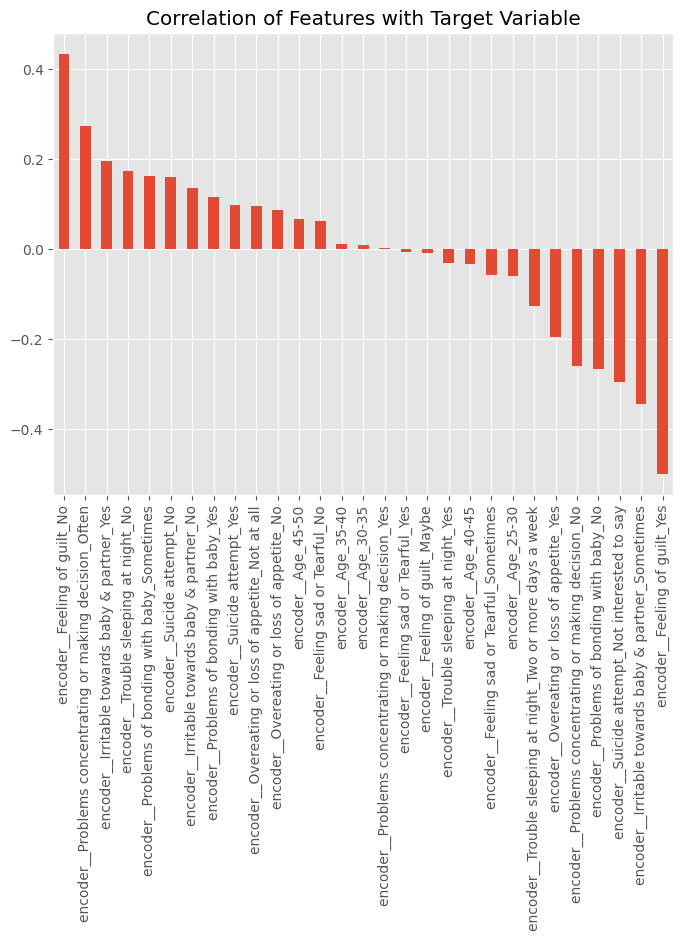

In [ ]:
#let's try correlation matrix
# Join Y back to X for the purpose of correlation analysis
data_for_correlation = X_encoded_df
data_for_correlation['Target'] = Y # Add your target variable back

# Calculate the correlation matrix
correlation_matrix = data_for_correlation.corr()

# Select and visualize the correlations of features with the target variable
correlations_with_target = correlation_matrix['Target'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
correlations_with_target.drop('Target').plot(kind='bar')  # Drop the self-correlation of Y
plt.title('Correlation of Features with Target Variable')
plt.show()

# **Training Models**

In [ ]:
#let's split the data to Train and Test
from sklearn.model_selection import train_test_split

# Assume X and Y are your features and labels, respectively.
# X_encoded = ... (My data features)
# Y_encoded= ... (My data labels)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y_encoded, test_size=0.2, random_state=42)
#convert both Y_train and Y_test back to single column labels or model gives an error
Y_train=Y_train.argmax(axis=1)
Y_test=Y_test.argmax(axis=1)

## Logistic Regression

In [ ]:
#Let's start with a simple of model of Logistic Regression (LR) without any over or undersampling
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

logistic_regression_classifier = LogisticRegression(max_iter = 1000, random_state=0)
logistic_regression_classifier.fit(X_train, Y_train)
Y_pred = logistic_regression_classifier.predict(X_test)


#evaluate  the model with accuracy scores
from sklearn.metrics import accuracy_score, classification_report


# Predict probabilities
probabilities = logistic_regression_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate ROC AUC
roc_auc = roc_auc_score(Y_test, probabilities)
print("ROC AUC Score:", roc_auc)

# Predict class labels for the evaluation
predictions = logistic_regression_classifier.predict(X_test)
print(classification_report(Y_test, predictions))


ROC AUC Score: 0.8998467041389883
              precision    recall  f1-score   support

           0       0.71      0.76      0.73        95
           1       0.88      0.85      0.87       206

    accuracy                           0.82       301
   macro avg       0.80      0.81      0.80       301
weighted avg       0.83      0.82      0.83       301



In [ ]:
#Let's try undersampling and then LR to compare
from imblearn.under_sampling import RandomUnderSampler


# Apply Random Under-Sampling
rus = RandomUnderSampler(random_state=42)
X_train_resampled, Y_train_resampled = rus.fit_resample(X_train, Y_train)

# Now X_train_resampled and Y_train_resampled have balanced classes
from sklearn.linear_model import LogisticRegression
logistic_regression_classifier = LogisticRegression(max_iter = 1000, random_state=0)
logistic_regression_classifier.fit(X_train_resampled, Y_train_resampled)
Y_pred = logistic_regression_classifier.predict(X_test)


#evaluate  the model with accuracy scores
from sklearn.metrics import accuracy_score, classification_report



# Predict probabilities
probabilities = logistic_regression_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate ROC AUC
roc_auc = roc_auc_score(Y_test, probabilities)
print("ROC AUC Score:", roc_auc)

# Predict class labels for the evaluation
predictions = logistic_regression_classifier.predict(X_test)
print(classification_report(Y_test, predictions))




ROC AUC Score: 0.8973939703628002
              precision    recall  f1-score   support

           0       0.65      0.83      0.73        95
           1       0.91      0.80      0.85       206

    accuracy                           0.81       301
   macro avg       0.78      0.81      0.79       301
weighted avg       0.83      0.81      0.81       301



Undersampling improved evaluation metrics for class "yes" but worsened the prediction for class "no".

In [ ]:
#Let's try doing stratified K-fold cross validation with the LR
from sklearn.model_selection import StratifiedKFold, cross_validate


# Assuming X and Y are your features and labels, respectively
Y=np.argmax(Y_encoded, axis=1)
# Initialize a logistic regression model
model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

# Initialize the stratified K-fold object
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc']
cv_results = cross_validate(model, X_encoded, Y, cv=stratified_k_fold, scoring=scoring_metrics)

# Print the accuracy for each fold
#print(f'Accuracy for each fold: {cv_results}')

# Print the results for each metric
for metric in scoring_metrics:
    scores = cv_results[f'test_{metric}']
    print(f'{metric.capitalize()} for each fold: {scores}')
    print(f'Mean {metric}: {np.mean(scores)}\n')

#the use of macro averages is useful for imbalanced data as it calculates for each label

# Extract ROC-AUC scores from the results
roc_auc_scores = cv_results['test_roc_auc']

# Calculate the mean and standard deviation of the ROC-AUC scores
mean_roc_auc = np.mean(roc_auc_scores)
std_dev_roc_auc = np.std(roc_auc_scores)

# Print the mean and standard deviation
print(f'Mean ROC-AUC: {mean_roc_auc:.4f}')
print(f'Standard Deviation of ROC-AUC: {std_dev_roc_auc:.4f}')

Accuracy for each fold: [0.83056478 0.81727575 0.81063123 0.8        0.81666667]
Mean accuracy: 0.8150276854928018

Precision_macro for each fold: [0.82180095 0.80215955 0.79670273 0.78056173 0.79842281]
Mean precision_macro: 0.7999295525304875

Recall_macro for each fold: [0.79693878 0.78894558 0.77721088 0.7724686  0.79425039]
Mean recall_macro: 0.7859628466771325

F1_macro for each fold: [0.80657721 0.79460553 0.78495958 0.77610826 0.79623341]
Mean f1_macro: 0.7916967961792428

Roc_auc for each fold: [0.90301263 0.89071914 0.8909621  0.89673273 0.91390306]
Mean roc_auc: 0.8990659340659342

Mean ROC-AUC: 0.8991
Standard Deviation of ROC-AUC: 0.0087


stratified cross-validation "considers" data class imbalances



In [ ]:
# let's re-train the LR again but with only one feature "Feeling of guilt" in an imbalance data WITHOUT any cross-validation
#the reason to do so is to compare this feature selection effect on the metrics of the worse performing model with bias
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Assuming X_encoded_df is already defined and contains the one-hot encoded features
# Assuming column_names is the array of new column names from ColumnTransformer

# Step 1: Identify the columns for "feeling of guilt"
# This depends on how the encoding was named but might look something like this:
guilt_columns = [col for col in column_names if 'encoder__Feeling of guilt' in col]

# Step 2: Isolate these columns in a new DataFrame
X_guilt = X_encoded_df[guilt_columns]

# Step 3: Define your target variable if not already defined
Y = Y  # Ensure Y is defined correctly as your target array

# Optional: Split your data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_guilt, Y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, Y_train)

# Predict probabilities
probabilities = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate ROC AUC
roc_auc = roc_auc_score(Y_test, probabilities)
print("ROC AUC Score:", roc_auc)

# Predict class labels for the evaluation
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))



ROC AUC Score: 0.8061829330608073
              precision    recall  f1-score   support

           0       0.71      0.55      0.62        95
           1       0.81      0.90      0.85       206

    accuracy                           0.79       301
   macro avg       0.76      0.72      0.74       301
weighted avg       0.78      0.79      0.78       301



The accuracy got worse
both precision, recall  and F1 score got worse ( were 0.83, 0.82, 0.83) respectively and all now 0.78, 0.79, 0.78 repsectively.

# K-Nearest Neighbors

To start with, let's use our split data (X_train, X_test, Y_train, Y_test) to search for the best parameter k

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,Y_train)
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))



Let's plot the outcome to see which one is the best

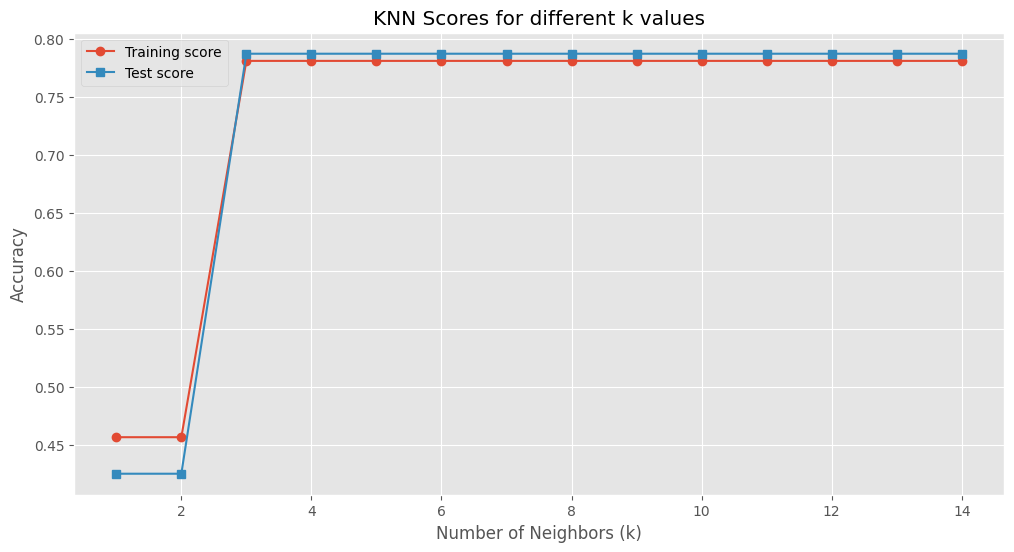

In [ ]:
import matplotlib.pyplot as plt

# Plotting the scores
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), train_scores, marker='o', label='Training score')
plt.plot(range(1, 15), test_scores, marker='s', label='Test score')

plt.title('KNN Scores for different k values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

###NOTE : my initital run of this code gave the best k=5 and now it gives k=3?

Best k (based on mean accuracy): 1
Accuracy at best k: 0.9880
Precision_macro at best k: 0.9878
Recall_macro at best k: 0.9859
F1_macro at best k: 0.9868
Roc_auc at best k: 0.9859


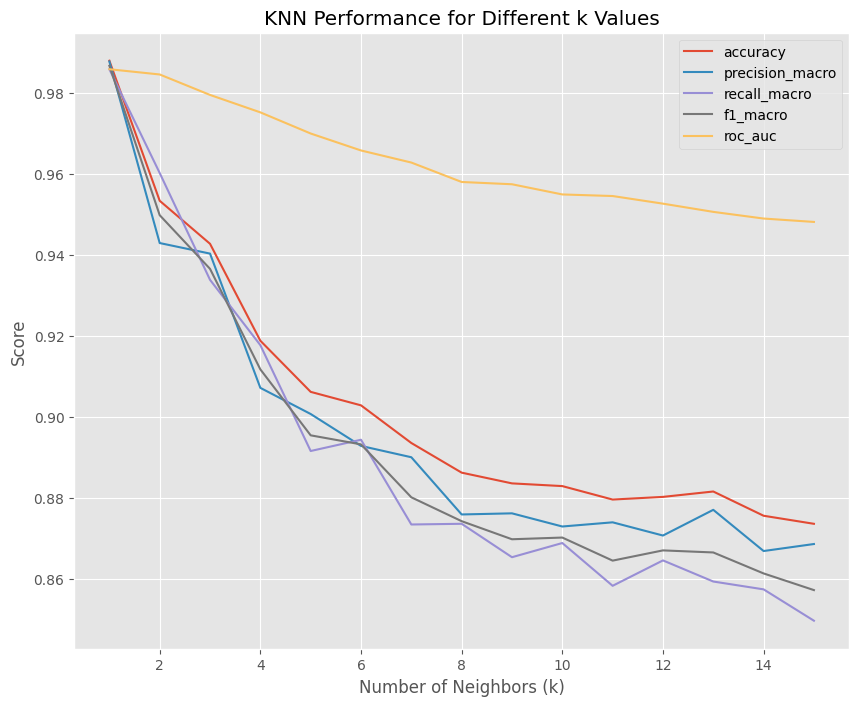

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Assuming X_encoded and Y are your features and labels
# Note: Ensure X_encoded is correctly preprocessed and encoded features suitable for KNN

# Initialize the stratified K-fold object
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the range of k values to try
k_values = range(1, 16)

# Store the average scores for each k
average_scores = {}

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)

    # Specify the metrics for evaluation
    scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc']

    # Perform 5-fold stratified cross-validation
    cv_results = cross_validate(knn_model, X_encoded, Y, cv=stratified_k_fold, scoring=scoring_metrics)

    # Calculate the mean of each metric across folds for the current k
    mean_scores = {metric: np.mean(cv_results[f'test_{metric}']) for metric in scoring_metrics}
    average_scores[k] = mean_scores

# Now, find the best k based on a chosen metric, e.g., mean accuracy
best_k = max(average_scores, key=lambda k: average_scores[k]['accuracy'])

# Print the results
print(f"Best k (based on mean accuracy): {best_k}")
for metric in scoring_metrics:
    print(f"{metric.capitalize()} at best k: {average_scores[best_k][metric]:.4f}")

# You may also want to plot the results to visually inspect them
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for metric in scoring_metrics:
    plt.plot(k_values, [average_scores[k][metric] for k in k_values], label=metric)

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.legend()
plt.title('KNN Performance for Different k Values')
plt.show()

####NOTE:  running this second time gives me k=3 as best parameter, whereas previously it was k=5

In [ ]:
# Import necessary library and fit the model

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay



# Initialize the KNN model
# You can adjust the number of neighbors (n_neighbors) based on your dataset and problem
knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski', p = 2)###### I have run this previously as k=5

# Initialize the stratified K-fold object
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Specify the metrics for evaluation
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc']

# Perform 5-fold stratified cross-validation
cv_results = cross_validate(knn_model, X_encoded, Y, cv=stratified_k_fold, scoring=scoring_metrics)

# Print the results for each metric
for metric in scoring_metrics:
    scores = cv_results[f'test_{metric}']
    print(f'{metric.capitalize()} for each fold: {scores}')
    print(f'Mean {metric}: {np.mean(scores)}\n')

# Extract ROC-AUC scores from the results
roc_auc_scores = cv_results['test_roc_auc']

# Calculate the mean and standard deviation of the ROC-AUC scores
mean_roc_auc = np.mean(roc_auc_scores)
std_dev_roc_auc = np.std(roc_auc_scores)

# Print the mean and standard deviation
print(f'Mean ROC-AUC: {mean_roc_auc:.4f}')
print(f'Standard Deviation of ROC-AUC: {std_dev_roc_auc:.4f}')

Accuracy for each fold: [0.9269103  0.94684385 0.94684385 0.93666667 0.95666667]
Mean accuracy: 0.9427862679955703

Precision_macro for each fold: [0.92115328 0.94996968 0.94996968 0.92556843 0.95514702]
Mean precision_macro: 0.9403616170742186

Recall_macro for each fold: [0.91734694 0.93265306 0.93265306 0.93799058 0.94878336]
Mean recall_macro: 0.9338854003139717

F1_macro for each fold: [0.9191966  0.94039604 0.94039604 0.93113863 0.95183699]
Mean f1_macro: 0.9365928595269525

Roc_auc for each fold: [0.97327502 0.99164237 0.97220603 0.98135793 0.9793956 ]
Mean roc_auc: 0.9795753905957987

Mean ROC-AUC: 0.9796
Standard Deviation of ROC-AUC: 0.0070


# SVM

In [ ]:

from sklearn.svm import SVC

SVM_classifier = SVC(kernel = 'linear', random_state = 0)

# Initialize the stratified K-fold object
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Specify the metrics for evaluation
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro','roc_auc']

# Perform 5-fold stratified cross-validation
cv_results = cross_validate(SVM_classifier, X_encoded, Y, cv=stratified_k_fold, scoring=scoring_metrics)

# Print the results for each metric
for metric in scoring_metrics:
    scores = cv_results[f'test_{metric}']
    print(f'{metric.capitalize()} for each fold: {scores}')
    print(f'Mean {metric}: {np.mean(scores)}\n')

# Extract ROC-AUC scores from the results
roc_auc_scores = cv_results['test_roc_auc']

# Calculate the mean and standard deviation of the ROC-AUC scores
mean_roc_auc = np.mean(roc_auc_scores)
std_dev_roc_auc = np.std(roc_auc_scores)

# Print the mean and standard deviation
print(f'Mean ROC-AUC: {mean_roc_auc:.4f}')
print(f'Standard Deviation of ROC-AUC: {std_dev_roc_auc:.4f}')



Accuracy for each fold: [0.84385382 0.84053156 0.80730897 0.82       0.85333333]
Mean accuracy: 0.8330055370985603

Precision_macro for each fold: [0.84186047 0.83111042 0.79627242 0.80329359 0.84252451]
Mean precision_macro: 0.8230122831914828

Recall_macro for each fold: [0.80714286 0.81122449 0.76802721 0.79454474 0.82908163]
Mean recall_macro: 0.8020041862899004

F1_macro for each fold: [0.81978574 0.81938194 0.77822663 0.79849744 0.835     ]
Mean f1_macro: 0.8101783474214221

Roc_auc for each fold: [0.90189504 0.85437318 0.85252672 0.88245683 0.90428768]
Mean roc_auc: 0.8791078904089108

Mean ROC-AUC: 0.8791
Standard Deviation of ROC-AUC: 0.0223



## Random Forest



In [ ]:
#let's try without 5-fold cross-validation first
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
random_forest_classifier.fit(X_train, Y_train)
Y_pred = random_forest_classifier.predict(X_test)

#evaluate  the model with accuracy scores
from sklearn.metrics import accuracy_score, classification_report

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

# Print a detailed classification report
print(classification_report(Y_test, Y_pred))

Accuracy: 0.7873754152823921
              precision    recall  f1-score   support

           0       0.71      0.55      0.62        95
           1       0.81      0.90      0.85       206

    accuracy                           0.79       301
   macro avg       0.76      0.72      0.74       301
weighted avg       0.78      0.79      0.78       301



In [ ]:
#let's now try the same model but with 5-fold stratified cross-validation
RF_model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)

# Initialize the stratified K-fold object
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Specify the metrics for evaluation
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro','roc_auc']

# Perform 5-fold stratified cross-validation
cv_results = cross_validate(RF_model, X_encoded, Y, cv=stratified_k_fold, scoring=scoring_metrics, return_estimator=True)

# Print the results for each metric
for metric in scoring_metrics:
    scores = cv_results[f'test_{metric}']
    print(f'{metric.capitalize()} for each fold: {scores}')
    print(f'Mean {metric}: {np.mean(scores)}\n')


#stratified cross-validation prevents overfitting of the model and considers imbalanced data

# Extract ROC-AUC scores from the results
roc_auc_scores = cv_results['test_roc_auc']

# Calculate the mean and standard deviation of the ROC-AUC scores
mean_roc_auc = np.mean(roc_auc_scores)
std_dev_roc_auc = np.std(roc_auc_scores)

# Print the mean and standard deviation
print(f'Mean ROC-AUC: {mean_roc_auc:.4f}')
print(f'Standard Deviation of ROC-AUC: {std_dev_roc_auc:.4f}')





Accuracy for each fold: [0.99335548 1.         0.97342193 0.99       0.99333333]
Mean accuracy: 0.9900221483942413

Precision_macro for each fold: [0.99494949 1.         0.98039216 0.98598131 0.99056604]
Mean precision_macro: 0.9903777995918608

Recall_macro for each fold: [0.99047619 1.         0.96190476 0.99234694 0.99489796]
Mean recall_macro: 0.9879251700680273

F1_macro for each fold: [0.99265424 1.         0.97019802 0.98903495 0.99267399]
Mean f1_macro: 0.9889122406463698

Roc_auc for each fold: [1.         1.         0.99761905 0.99963206 1.        ]
Mean roc_auc: 0.999450222396651

Mean ROC-AUC: 0.9995
Standard Deviation of ROC-AUC: 0.0009


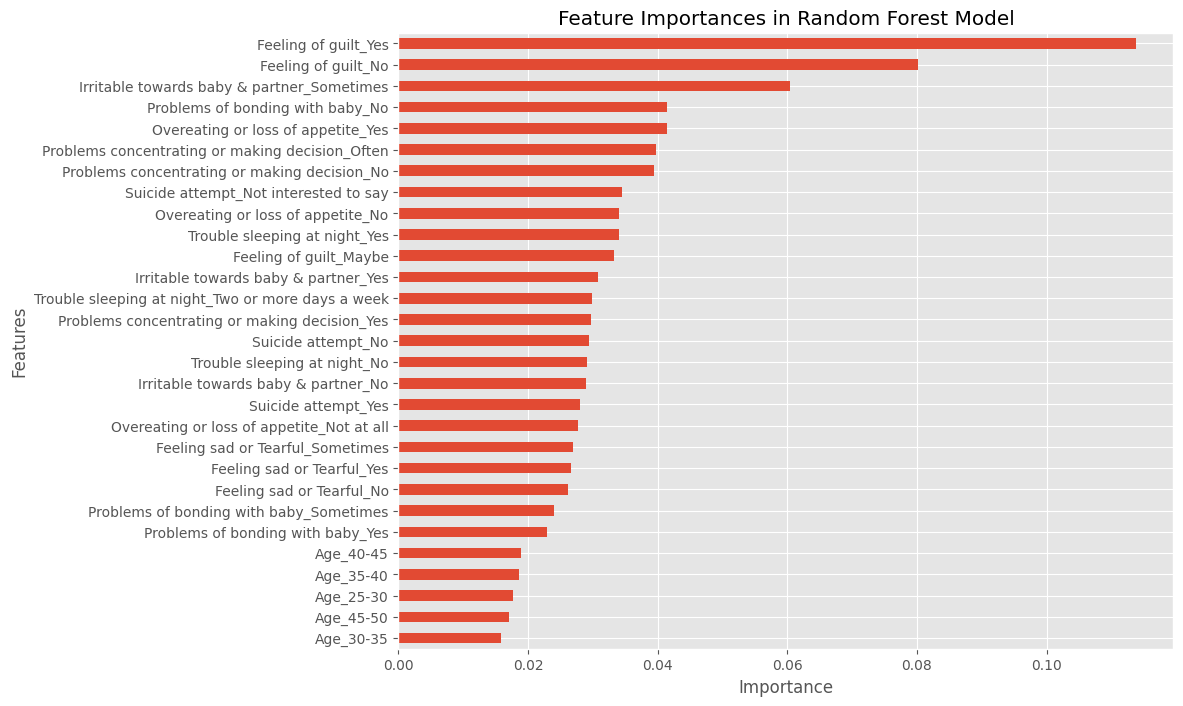

In [ ]:
# To extract feature importances
feature_importances = np.zeros(X_encoded.shape[1])  # Initialize an array to store average feature importances

# Aggregate feature importances from each fold
for model in cv_results['estimator']:
    feature_importances += model.feature_importances_

feature_importances /= len(cv_results['estimator'])  # Average the feature importances across all folds

# Optionally, print feature importances
#print("Feature importances: ", feature_importances)
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'encoder' is your OneHotEncoder instance and X_encoded is the transformed data
encoder = OneHotEncoder()  # If this was how your data was transformed
X = X  # Your original data before encoding
X_encoded = encoder.fit_transform(X)

# Retrieve feature names from the encoder
feature_names = encoder.get_feature_names_out()

# Assuming 'feature_importances' contains importances from your RandomForest model
importances = pd.Series(feature_importances, index=feature_names)

# Sort the features by importance
sorted_importances = importances.sort_values()

# Plotting
plt.figure(figsize=(10, 8))
sorted_importances.plot(kind='barh')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


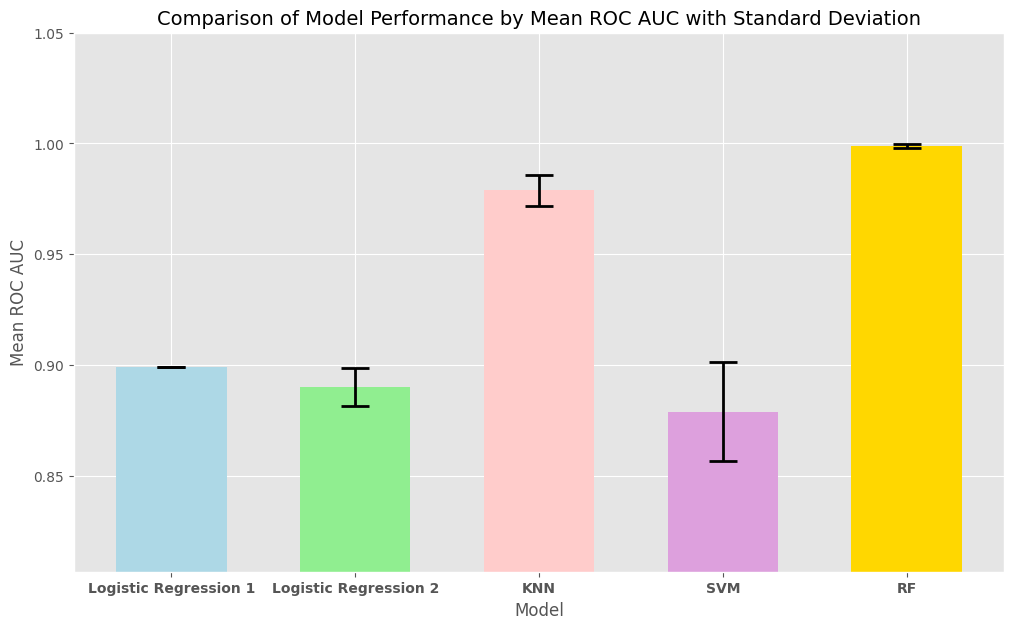

In [ ]:
#let's plot ROC-AUC values in a barchart with standard deviations. I cannot make ROC-AUC curves as 5fold CV does not produce probabilities
# Remove black borders from each bar by setting 'edgecolor' to the same as the bar color
import matplotlib.pyplot as plt

models = ['Logistic Regression 1', 'Logistic Regression 2', 'KNN', 'SVM', 'RF']
mean_aucs = [0.899, 0.89, 0.979, 0.879, 0.999]
std_devs = [0.0, 0.0087, 0.007, 0.0223, 0.0009]  # Assuming 0.0 std for the first entry

# Create a bar chart with error bars
bar_width = 0.6
paler_colors = ['#add8e6', '#90ee90', '#ffcccb', '#dda0dd', '#ffd700']

plt.figure(figsize=(12, 7))
bars = plt.bar(models, mean_aucs, width=bar_width, yerr=std_devs, capsize=10, color=paler_colors,
               error_kw={'elinewidth':2, 'capthick':2, 'ecolor':'black'})

plt.xlabel('Model', fontsize=12)
plt.ylabel('Mean ROC AUC', fontsize=12)
plt.title('Comparison of Model Performance by Mean ROC AUC with Standard Deviation', fontsize=14)
plt.xticks(fontsize=10, fontweight='bold')  # Bolder model names
plt.ylim(min(mean_aucs) - max(std_devs) - 0.05, 1.05)  # Adjust the limits based on your actual AUC values and std devs

# Show plot
plt.show()
